# CONCLUSION: no meaningful difference when let to train for longer; seems like epoch=100 is a good balance

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

In [3]:
from datamodels.grassy_mnist import get_grassy_mnist
from models.cvae import ContrastiveVAE
from models.vae import VAE
from models.train import train
from datamodels.utils import plot_sweeps_mnist, plot_latent_space

In [4]:
BATCH_SIZE = 128
EPOCHS = 1000

In [5]:
target, target_labels, background = get_grassy_mnist(scale=2) ## SCALE

In [6]:
ds = torch.stack([target, background], axis=1)
dataloader = DataLoader(dataset=ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
model = ContrastiveVAE(input_dim=28*28, hidden_dim=32, latent_dim=2, tc=True)

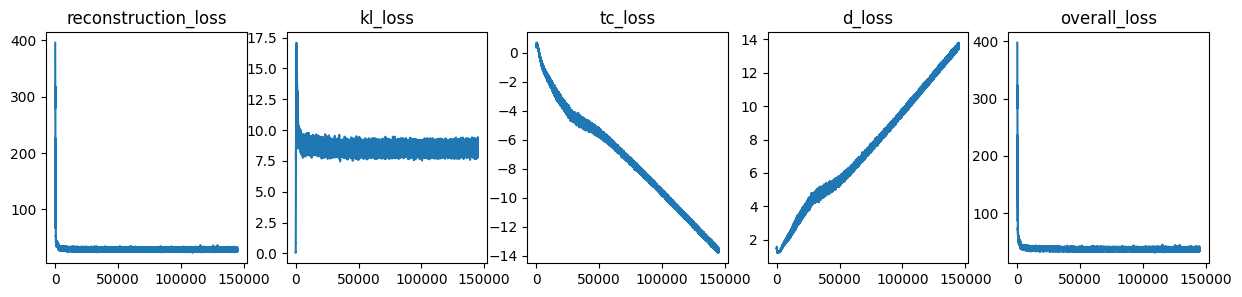

In [7]:
optimizer = Adam(model.parameters(), lr=1e-4)
losses = train(model, dataloader, optimizer, epochs=EPOCHS)

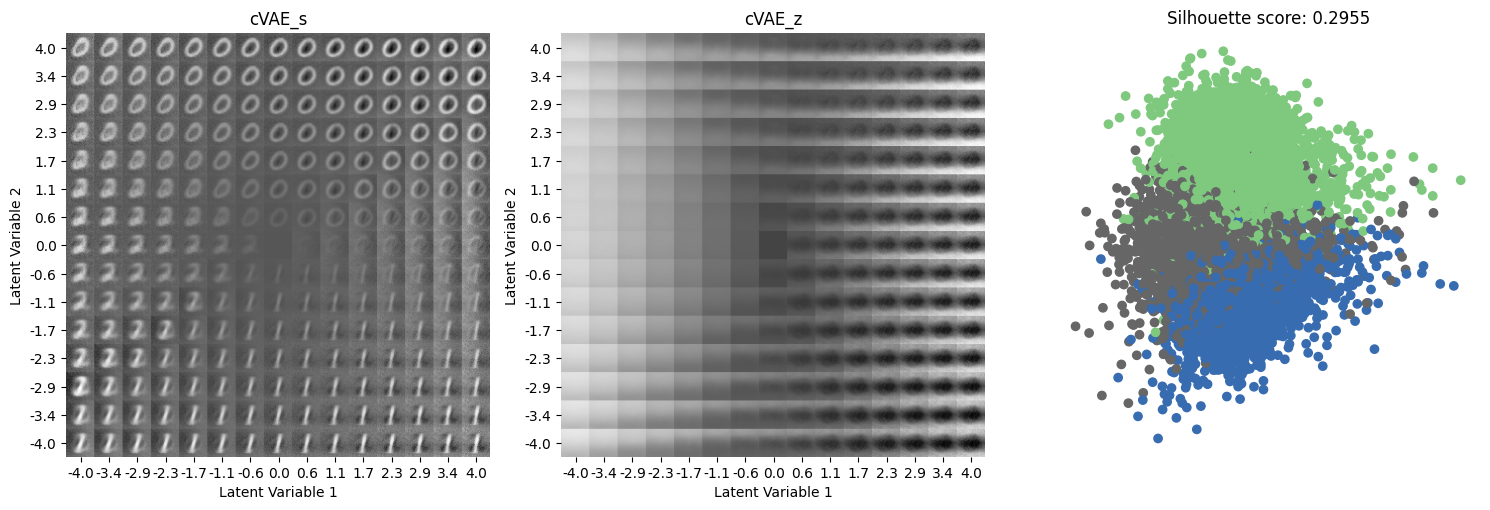

In [8]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
plot_sweeps_mnist(model.decoder, option="cVAE_s", ax=ax1)
plot_sweeps_mnist(model.decoder, option="cVAE_z", ax=ax2)
plot_latent_space(model.s_encoder, target, target_labels, ax=ax3)
plt.tight_layout();

In [9]:
# each model training run results in different result (due to training dynamics)

In [10]:
dataloader = DataLoader(dataset=target, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
model = VAE(input_dim=28*28, hidden_dim=32, latent_dim=2, use_bias=True)

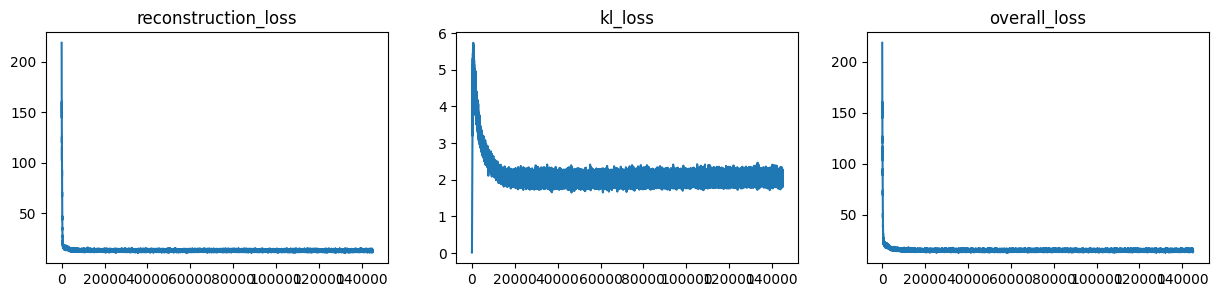

In [11]:
optimizer = Adam(model.parameters(), lr=1e-4)
losses = train(model, dataloader, optimizer, epochs=EPOCHS)

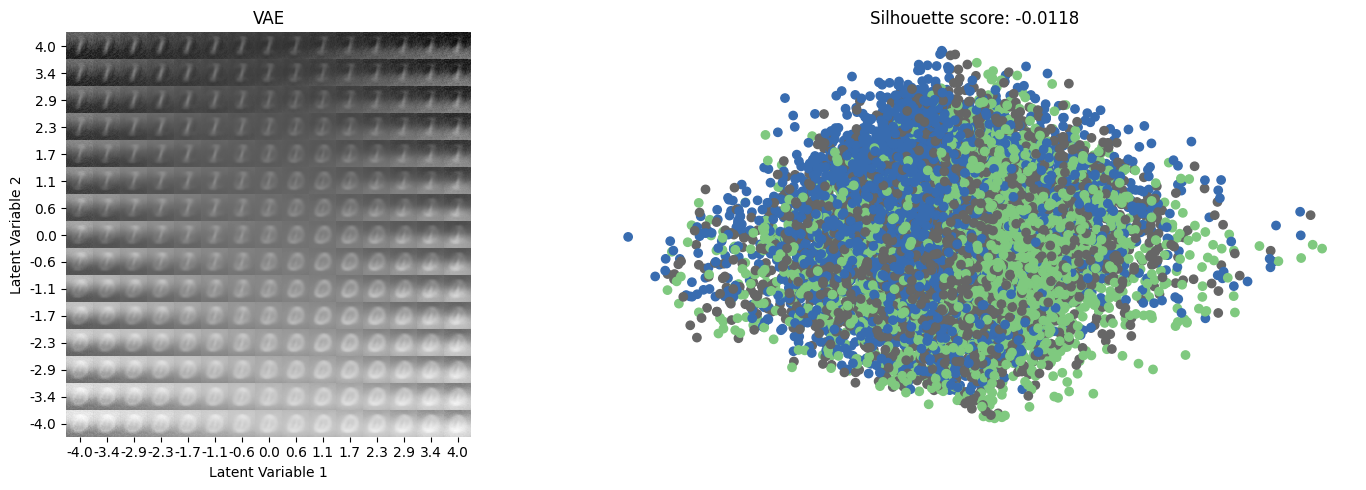

In [12]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
plot_sweeps_mnist(model.decoder, option="VAE", ax=ax1)
plot_latent_space(model.encoder, target, target_labels, ax=ax2)
plt.tight_layout();